<div style="background-color: #f0f0f0; padding: 10px; text-align: center;">
    <h1 style="font-size: 24px;">Hand Gesture Recognition</h1>
    <h3 style="font-size: 18px;">Using TensorFlow and DenseNet</h3>
</div>


In [1]:
!pip install kaggle

In [2]:
#configuring the path of kaggle file .json type
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

 **Generating API key**

In [3]:
# using API to fetch dataset from Kaggle
!kaggle datasets download -d roobansappani/hand-gesture-recognition

 52% 14.0M/27.1M [00:00<00:00, 60.6MB/s]
100% 27.1M/27.1M [00:00<00:00, 86.5MB/s]


**Importing Hand Gesture database**

In [4]:
# extracting the dataset from its compressed format
from zipfile import ZipFile
dataset='/content/hand-gesture-recognition.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


**Importing Libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

<div style="background-color: #f0f0f0; padding: 10px; text-align: center;">
    <h1 style="font-size: 24px;">Code Starts Here</h1>
</div>


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
directory = '/content/HandGesture/images'

In [10]:
Name=[]
for file in os.listdir(directory):
    if file[-4:]!='pt.m' and file[-4:]!='.txt':
        Name+=[file]
print(Name)
print(len(Name))

['up', 'scissor', 'paper', 'thumbs', 'peace', 'okay', 'rock', 'call_me', 'rock_on', 'fingers_crossed']
10


In [12]:
# Given a list of names
Name = [...]

# Create a dictionary where names are keys and numerical indices are values
normal_mapping = {name: index for index, name in enumerate(Name)}

# Create a function that takes a numerical index and returns the corresponding name
def mapper(value):
    return Name[value]

In [13]:
File=[]
for file in os.listdir(directory):
    File+=[file]
    print(file)

up
scissor
paper
thumbs
peace
okay
rock
call_me
rock_on
fingers_crossed


This code takes a collection of image files organized in folders by category. It reads these images, resizes them, normalizes their pixel values, and separates them into a training dataset (dataset) and a test dataset (testset) based on the number of images processed (t). The category information is stored as count, and it increases as the code moves to process images from the next category. This prepares the data for a machine learning task where images and their corresponding categories are used to train and test a model.

In [14]:
dataset=[]
testset=[]
count=0
for file in File:
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        if im[-4:]!='pt.m' and im[-4:]!='.txt':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(60,60))
            image=img_to_array(image)
            image=image/255.0
            if t<400:
                dataset.append([image,count])
            else:
                testset.append([image,count])
            t+=1
    count=count+1

In [17]:
data = []
labels0 = []

for item in dataset:
    image, label = item
    data.append(image)
    labels0.append(label)

test = []
tlabels0 = []

for item in testset:
    image, label = item
    test.append(image)
    tlabels0.append(label)

In [18]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [20]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [21]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(3200, 60, 60, 3)
(800, 60, 60, 3)
(3200, 10)
(800, 10)


`ImageDataGenerator`: This tool helps make different versions of pictures.

`horizontal_flip=True`: Flips pictures like a mirror, making things look different.

`vertical_flip=True`: Flips pictures upside down for more variety.

`rotation_range=20`: Twists pictures a bit, like turning a piece of paper.

`zoom_range=0.2`: Makes some parts of the picture look bigger or smaller, like a magnifying glass.

`width_shift_range=0.2`: Slides the picture a bit left or right.

`height_shift_range=0.2`: Slides the picture a bit up or down.

`shear_range=0.1`: Tilts the picture a bit, like a sliding door.

`fill_mode="nearest"`: Fills blank spaces with the nearest color after changing the picture.

In [22]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

This code sets up a powerful image analysis model (**DenseNet201**) that's already good at understanding images. By making it non-trainable, you can use it to extract meaningful features from your data without altering the original model's abilities. This is often useful when you want to build a new model on top of these features for a specific task.

`pretrained_model3 = tf.keras.applications.DenseNet201(...):`
tf.keras.applications.DenseNet201 is a function provided by TensorFlow that loads a pre-trained DenseNet-201 model. DenseNet is a type of deep neural network architecture commonly used for tasks like image classification.

`input_shape=(60, 60, 3)` specifies that the input images should have a size of 60x60 pixels and 3 color channels (R, G, B).

include_top=False means that the final fully connected layers (often used for classification) won't be included in the loaded model. This is useful when you want to use the pre-trained model as a feature extractor.

`weights='imagenet'` specifies that the model's initial weights should be loaded from a set of weights pre-trained on the ImageNet dataset. This helps the model start with useful features learned from a large dataset.

`pooling='avg'` indicates that the global average pooling operation will be applied to the output of the loaded model. This operation helps reduce the spatial dimensions of the feature maps while retaining important information.

In [23]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(60,60,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74836368/74836368 [==============================] - 0s 0us/step


In [26]:
import tensorflow as tf

# Get the input layer of the pretrained model
inputs3 = pretrained_model3.input

# Add a Dense layer with 128 units and ReLU activation
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)

# Add another Dense layer with 64 units and ReLU activation
x3 = tf.keras.layers.Dense(64, activation='relu')(x3)

# Add a Dropout layer to prevent overfitting
x3 = tf.keras.layers.Dropout(0.5)(x3)

# Add the final Dense layer for classification with softmax activation
outputs3 = tf.keras.layers.Dense(10, activation='softmax')(x3)

# Create the new model
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=200)

Epoch 1/200
100/100 [==============================] - 23s 94ms/step - loss: 0.6940 - accuracy: 0.7706 - val_loss: 0.2865 - val_accuracy: 0.9137
Epoch 2/200
100/100 [==============================] - 7s 69ms/step - loss: 0.6602 - accuracy: 0.7844 - val_loss: 0.3150 - val_accuracy: 0.9000
Epoch 3/200
100/100 [==============================] - 7s 66ms/step - loss: 0.6817 - accuracy: 0.7734 - val_loss: 0.2876 - val_accuracy: 0.9187
Epoch 4/200
100/100 [==============================] - 6s 55ms/step - loss: 0.6654 - accuracy: 0.7809 - val_loss: 0.2649 - val_accuracy: 0.9225
Epoch 5/200
100/100 [==============================] - 6s 60ms/step - loss: 0.6583 - accuracy: 0.7788 - val_loss: 0.2717 - val_accuracy: 0.9200
Epoch 6/200
100/100 [==============================] - 6s 57ms/step - loss: 0.6514 - accuracy: 0.7791 - val_loss: 0.2825 - val_accuracy: 0.9150
Epoch 7/200
100/100 [==============================] - 6s 56ms/step - loss: 0.6606 - accuracy: 0.7803 - val_loss: 0.3626 - val_accuracy

In [29]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

25/25 [==============================] - 4s 23ms/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.91        65
           2       0.95      0.98      0.96        91
           3       0.95      0.90      0.92        89
           4       0.96      0.92      0.94        84
           5       0.98      1.00      0.99        87
           6       0.99      0.96      0.97        73
           7       0.90      0.97      0.93        79
           8       0.86      0.90      0.88        83
           9       0.89      0.86      0.88        78

    accuracy                           0.94       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.94      0.93       800



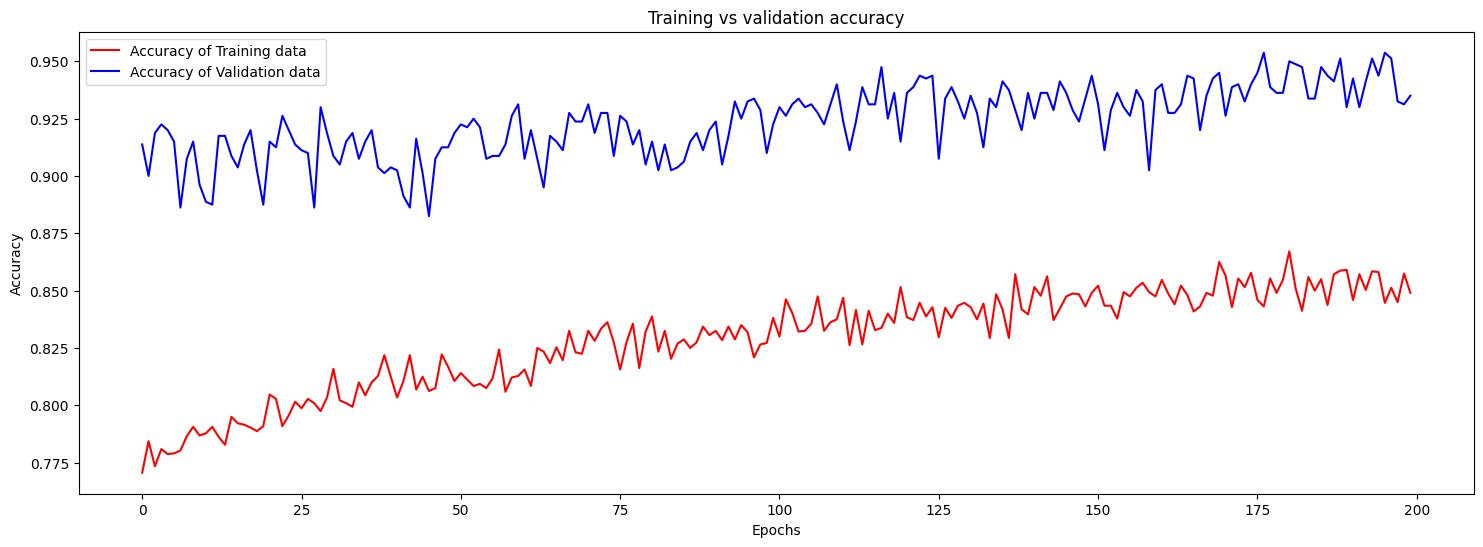

In [33]:
import matplotlib.pyplot as plt

get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))

# Set the size of the figure
plt.figure(figsize=(18, 6))  # Adjust width and height as needed

plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

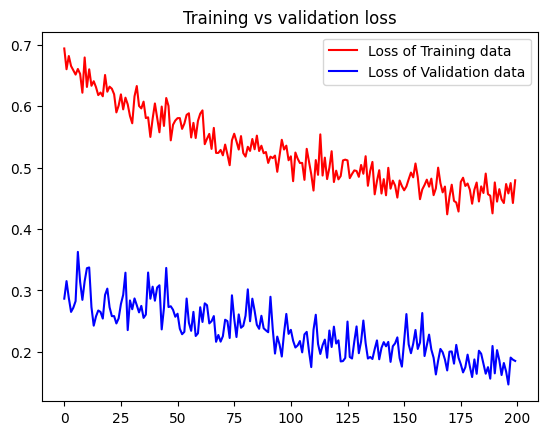

<Figure size 640x480 with 0 Axes>

In [38]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [39]:
# Assuming you have 'X_test' and 'y_test' data
loss, accuracy = model.evaluate(testx, testy)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

25/25 [==============================] - 1s 45ms/step - loss: 0.1850 - accuracy: 0.9350
Test loss: 0.18504250049591064
Test accuracy: 0.9350000023841858


Making the model predict Stuffs

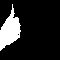

In [45]:
load_img("/content/HandGesture/images/thumbs/1032.jpg",target_size=(60,60))

In [54]:
# Load the image and preprocess it
image = load_img("/content/HandGesture/images/thumbs/1032.jpg", target_size=(60, 60))
image = img_to_array(image)
image = image / 255.0
prediction_image = np.expand_dims(image, axis=0)

# Make the prediction
prediction = model.predict(prediction_image)
predicted_class_index = np.argmax(prediction)

# List of class names corresponding to the order of classes in the model
class_names = ['up', 'scissor', 'paper', 'thumbs', 'peace', 'okay', 'rock', 'call_me', 'rock_on', 'fingers_crossed']

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]
print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 39ms/step
Predicted class: thumbs


In [49]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)
    PRED+=[value2]

(1243, 60, 60, 3)
39/39 [==============================] - 2s 61ms/step
(1243, 10)


In [50]:
ANS=tlabels0
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9259855189058729


<h3> ** Model Save and Test ** </h3>

In [51]:
model.save('handGesture.hdf5')
model2=keras.models.load_model('handGesture.hdf5')

In [52]:
prediction3=model2.predict(test)
PRED3=[]
for item in prediction3:
    value3=np.argmax(item)
    PRED3+=[value3]

39/39 [==============================] - 4s 22ms/step


In [53]:
accuracy3=accuracy_score(ANS,PRED3)
print(accuracy3)

0.9259855189058729


Converting the above model into a function so as to reduce my workload and I can call this as Milton say want without writing the entire code several times

In [56]:
def predict_gesture_class(image_path, model):
    # List of class names corresponding to the order of classes in the model
    class_names = ['up', 'scissor', 'paper', 'thumbs', 'peace', 'okay', 'rock', 'call_me', 'rock_on', 'fingers_crossed']
    image = load_img(image_path, target_size=(60, 60))
    image = img_to_array(image)
    image = image / 255.0
    prediction_image = np.expand_dims(image, axis=0)

    # Make the prediction
    prediction = model.predict(prediction_image)
    predicted_class_index = np.argmax(prediction)

    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_name

In [58]:
# Path to the image you want to predict
image_path = "/content/HandGesture/images/paper/1082.jpg"

# Call the function to get the predicted class name
predicted_class = predict_gesture_class(image_path, model)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 113ms/step
Predicted class: paper


In [60]:
# Path to the image you want to predict
image_path = "/content/Thumb.jpg"

# Call the function to get the predicted class name
predicted_class = predict_gesture_class(image_path, model)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 66ms/step
Predicted class: thumbs


In [61]:
# Path to the image you want to predict
image_path = "/content/Paper.jpeg"

# Call the function to get the predicted class name
predicted_class = predict_gesture_class(image_path, model)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 63ms/step
Predicted class: paper


In [67]:
# Path to the image you want to predict
image_path = "/content/ok.jpg"

# Call the function to get the predicted class name
predicted_class = predict_gesture_class(image_path, model)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 194ms/step
Predicted class: okay


In [69]:
# Path to the image you want to predict
image_path = "/content/up_phto.jpg"

# Call the function to get the predicted class name
predicted_class = predict_gesture_class(image_path, model)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 43ms/step
Predicted class: fingers_crossed


In [70]:
# Path to the image you want to predict
image_path = "/content/up_as_in_dataset.jpg"

# Call the function to get the predicted class name
predicted_class = predict_gesture_class(image_path, model)
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 105ms/step
Predicted class: up
